In [18]:
import tweepy
import pandas as pd
import numpy as np
from datetime import datetime

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Import keys
from credentials import *

In [3]:
# Setup Twitter API connection
def twitter_setup():
    auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
    auth.set_access_token(ACCESS_TOKEN, ACCESS_SECRET)
    
    api = tweepy.API(auth)
    return api

In [183]:
# Extract Twitter data
extractor = twitter_setup()

tweets = extractor.user_timeline(screen_name='realdonaldtrump', count=200)
print('Number of tweets extracted: {}.\n'.format(len(tweets)))

# Display 5 most recent tweets
print('5 recent tweets:\n')
for idx, tweet in enumerate(tweets[:10]):
    # if tweet.text.startswith('RT'):
        print("%d.) %s\n" % (idx+1, tweet.text))

Number of tweets extracted: 200.

5 recent tweets:

1.) Congratulations to #TeamUSA🇺🇸🏆on your great @PresidentsCup victory! https://t.co/fZeP1e9mo7

2.) Being nice to Rocket Man hasn't worked in 25 years, why would it work now? Clinton failed, Bush failed, and Obama failed. I won't fail.

3.) ...Save your energy Rex, we'll do what has to be done!

4.) I told Rex Tillerson, our wonderful Secretary of State, that he is wasting his time trying to negotiate with Little Rocket Man...

5.) ...for safety. Thank you to the Governor of P.R. and to all of those who are working so closely with our First Responders. Fantastic job!

6.) ...people are now starting to recognize the amazing work that has been done by FEMA and our great Military. All buildings now inspected.....

7.) We have done a great job with the almost impossible situation in Puerto Rico. Outside of the Fake News or politically motivated ingrates,...

8.) RT @SLandinSoCal: When you kneel for our #NationalAnthem, you aren't protest

In [ ]:
if tweet.text.startswith

In [184]:
# Create dataframe
df = pd.DataFrame([tweet.text for tweet in tweets], columns=['Tweets'])

df.head(n=10)

,Tweets
0,Congratulations to #TeamUSA🇺🇸🏆on your great @P...
1,Being nice to Rocket Man hasn't worked in 25 y...
2,"...Save your energy Rex, we'll do what has to ..."
3,"I told Rex Tillerson, our wonderful Secretary ..."
4,...for safety. Thank you to the Governor of P....
5,...people are now starting to recognize the am...
6,We have done a great job with the almost impos...
7,RT @SLandinSoCal: When you kneel for our #Nati...
8,"19,000 RESPECTING our National Anthem! #StandF..."
9,"In analyzing the Alabama Primary race,FAKE NEW..."


In [6]:
# Explore tweepy object
print(dir(tweets[0]))

['__class__', '__delattr__', '__dict__', '__doc__', '__eq__', '__format__', '__getattribute__', '__getstate__', '__hash__', '__init__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_api', '_json', 'author', 'contributors', 'coordinates', 'created_at', 'destroy', 'entities', 'favorite', 'favorite_count', 'favorited', 'geo', 'id', 'id_str', 'in_reply_to_screen_name', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status', 'lang', 'parse', 'parse_list', 'place', 'retweet', 'retweet_count', 'retweeted', 'retweets', 'source', 'source_url', 'text', 'truncated', 'user']


In [185]:
# Explore most recent tweet and its properties
print(tweets[0].id)
print(tweets[0].created_at)
print(tweets[0].source)
print(tweets[0].favorite_count)
print(tweets[0].favorited)
print(tweets[0].retweet_count)
print(tweets[0].retweeted)
print(tweets[0].geo)
print(tweets[0].coordinates)
print(tweets[0].entities)

914661855947366406
2017-10-02 01:22:34
Media Studio
27234
False
5409
False
None
None
{u'symbols': [], u'user_mentions': [{u'id': 282713139, u'indices': [44, 58], u'id_str': u'282713139', u'screen_name': u'PresidentsCup', u'name': u'Presidents Cup'}], u'hashtags': [{u'indices': [19, 27], u'text': u'TeamUSA'}], u'urls': [], u'media': [{u'expanded_url': u'https://twitter.com/realDonaldTrump/status/914661855947366406/video/1', u'display_url': u'pic.twitter.com/fZeP1e9mo7', u'url': u'https://t.co/fZeP1e9mo7', u'media_url_https': u'https://pbs.twimg.com/amplify_video_thumb/914655542374752256/img/yZqtFM8uJ3EWXgWs.jpg', u'id_str': u'914655542374752256', u'sizes': {u'small': {u'h': 191, u'resize': u'fit', u'w': 340}, u'large': {u'h': 576, u'resize': u'fit', u'w': 1024}, u'medium': {u'h': 338, u'resize': u'fit', u'w': 600}, u'thumb': {u'h': 150, u'resize': u'crop', u'w': 150}}, u'indices': [68, 91], u'type': u'photo', u'id': 914655542374752256, u'media_url': u'http://pbs.twimg.com/amplify_video_

In [186]:
# Add columns to df
df['len'] = np.array([len(tweet.text) for tweet in tweets])
df['ID'] = np.array([tweet.id for tweet in tweets])
df['Date'] = np.array([tweet.created_at for tweet in tweets])
df['Source'] = np.array([tweet.source for tweet in tweets])
df['Likes'] = np.array([tweet.favorite_count for tweet in tweets])
df['Retweets'] = np.array([tweet.retweet_count for tweet in tweets])

In [187]:
# Show first 10 records
df.head()

,Tweets,len,ID,Date,Source,Likes,Retweets
0,Congratulations to #TeamUSA🇺🇸🏆on your great @P...,91,914661855947366406,2017-10-02 01:22:34,Media Studio,27234,5409
1,Being nice to Rocket Man hasn't worked in 25 y...,135,914565910798782465,2017-10-01 19:01:19,Twitter for iPhone,127369,33636
2,"...Save your energy Rex, we'll do what has to ...",54,914497947517227008,2017-10-01 14:31:15,Twitter for iPhone,48071,11857
3,"I told Rex Tillerson, our wonderful Secretary ...",129,914497877543735296,2017-10-01 14:30:59,Twitter for iPhone,78856,21333
4,...for safety. Thank you to the Governor of P....,137,914467502251528192,2017-10-01 12:30:17,Twitter for iPhone,59827,11943


In [188]:
# Show datatypes
df.info(null_counts=True, memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
Tweets      200 non-null object
len         200 non-null int64
ID          200 non-null int64
Date        200 non-null datetime64[ns]
Source      200 non-null object
Likes       200 non-null int64
Retweets    200 non-null int64
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 142.0 KB


In [189]:
df.describe()

,len,ID,Likes,Retweets
count,200.000000,2.000000e+02,200.000000,200.000000
mean,124.185000,9.120075e+17,61302.825000,16256.220000
std,30.313119,1.666258e+15,47206.149472,11604.640497
min,18.000000,9.087963e+17,0.000000,1457.000000
25%,126.000000,9.104773e+17,37596.750000,8675.000000
50%,138.000000,9.120583e+17,58183.500000,13139.500000
75%,140.000000,9.135755e+17,79322.500000,19282.750000
max,151.000000,9.146619e+17,214455.000000,74403.000000


In [190]:
# Sort by various ways
df.sort_values(['Likes', 'len'], ascending=False).head()

,Tweets,len,ID,Date,Source,Likes,Retweets
114,Going to the White House is considered a great...,139,911572182060453893,2017-09-23 12:45:19,Twitter for iPhone,214455,64764
92,#StandForOurAnthem,18,912301271817838593,2017-09-25 13:02:27,Twitter for iPhone,207224,74403
94,The issue of kneeling has nothing to do with r...,136,912280282224525312,2017-09-25 11:39:03,Twitter for iPhone,206417,56087
100,Courageous Patriots have fought and died for o...,129,912037003923005440,2017-09-24 19:32:21,Twitter for iPhone,199226,52951
167,God bless the people of Mexico City. We are wi...,79,910233418474098688,2017-09-19 20:05:32,Twitter for iPhone,191079,53453


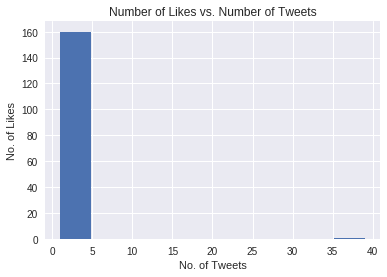

In [191]:
# Explore likes histogram
ax = df.Likes.value_counts().hist()
ax.set_title('Number of Likes vs. Number of Tweets')
ax.set_xlabel('No. of Tweets')
ax.set_ylabel('No. of Likes')

In [194]:
# Which tweets received zero likes?
df[df.Likes == 0].tail()

,Tweets,len,ID,Date,Source,Likes,Retweets
187,RT @Team_Trump45: @realDonaldTrump https://t....,59,909389478795636736,2017-09-17 12:12:02,Twitter for iPhone,0,3529
188,RT @Team_Trump45: @realDonaldTrump https://t....,59,909389385308700672,2017-09-17 12:11:39,Twitter for iPhone,0,9140
189,RT @glamourizes: @realDonaldTrump Only true Am...,140,909387958368784389,2017-09-17 12:05:59,Twitter for iPhone,0,7610
190,RT @Team_Trump45: @realDonaldTrump https://t....,59,909387131952549888,2017-09-17 12:02:42,Twitter for iPhone,0,5983
191,RT @dmartosko: This is the #NYTimes. Can you u...,138,909386650953961473,2017-09-17 12:00:47,Twitter for iPhone,0,7629


In [195]:
# Group by day
df.groupby([df.Date.dt.month, df.Date.dt.day]).count().Tweets

Date  Date
9     15       3
      16       2
      17      15
      18       5
      19       9
      20      25
      21       9
      22      11
      23      13
      24      11
      25       9
      26      17
      27      11
      28       8
      29      12
      30      31
10    1        8
      2        1
Name: Tweets, dtype: int64

In [196]:
# key step!
df.index = df['Date']

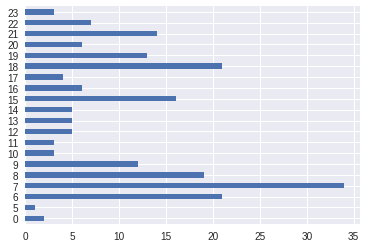

In [217]:
# convert utc to est? Find out what tz it is first.
df.groupby(df.index.tz_localize('GMT').tz_convert('US/Eastern').hour).count().Tweets.plot(kind='barh')

In [215]:
df.groupby(df.index.tz_localize('GMT').tz_convert('US/Eastern').hour).count().Tweets

0      2
5      1
6     21
7     34
8     19
9     12
10     3
11     3
12     5
13     5
14     5
15    16
16     6
17     4
18    21
19    13
20     6
21    14
22     7
23     3
Name: Tweets, dtype: int64

In [ ]:
df.groupby(df.index.tz_localize('GMT').tz_convert('US/Eastern').hour).count().Tweets.max

In [ ]:
df.groupby(df.index.tz_localize('GMT').tz_convert('US/Eastern').hour).count().Tweets.max

In [150]:
xticks_12 = ['12 AM', '1 AM', '2 AM', '3 AM', '4 AM', '5 AM', '6 AM', '7 AM', '8 AM', '9 AM', '10 AM', '11 AM',
            '12 PM', '1 PM', '2 PM', '3 PM', '4 PM', '5 PM', '6 PM', '7 PM', '8 PM', '9 PM', '10 PM', '11 PM']

In [174]:
# Show GMT to EDT
df.index.tz_localize('GMT').tz_convert('US/Eastern')

DatetimeIndex(['2017-09-30 19:32:54-04:00', '2017-09-29 13:15:41-04:00',
               '2017-09-27 11:58:01-04:00', '2017-09-25 09:56:34-04:00',
               '2017-09-23 09:58:02-04:00', '2017-09-22 21:37:36-04:00',
               '2017-09-22 20:49:09-04:00', '2017-09-22 20:48:49-04:00',
               '2017-09-22 17:14:31-04:00', '2017-09-22 13:56:35-04:00',
               ...
               '2016-09-20 13:25:32-04:00', '2016-09-20 13:02:31-04:00',
               '2016-09-18 09:08:17-04:00', '2016-09-17 11:22:30-04:00',
               '2016-09-16 19:44:25-04:00', '2016-09-09 16:47:07-04:00',
               '2016-08-12 15:08:10-04:00', '2016-08-12 15:05:09-04:00',
               '2016-08-11 19:14:47-04:00', '2016-08-11 14:48:14-04:00'],
              dtype='datetime64[ns, US/Eastern]', name=u'Date', length=200, freq=None)

In [175]:
# Time format x-axis to 12-o'clock time
xticks = pd.date_range('00:00', '23:00', freq='H', tz='US/Eastern').map(lambda x: pd.datetime.strftime(x, '%I %p'))
xticks

array(['12 AM', '01 AM', '02 AM', '03 AM', '04 AM', '05 AM', '06 AM',
       '07 AM', '08 AM', '09 AM', '10 AM', '11 AM', '12 PM', '01 PM',
       '02 PM', '03 PM', '04 PM', '05 PM', '06 PM', '07 PM', '08 PM',
       '09 PM', '10 PM', '11 PM'], dtype=object)

In [142]:
pd.date_range?

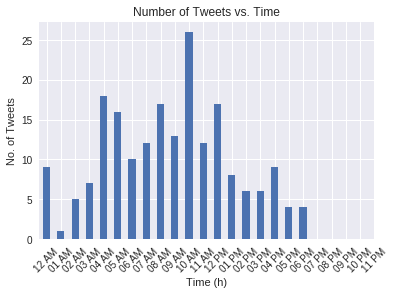

In [176]:
# Convert from GMT to US EST.
ax = df.groupby(df.index.tz_localize('GMT').tz_convert('US/Eastern').hour).count().Tweets.plot(kind='bar')
ax.set_xticks(np.arange(24))
ax.set_xticklabels(xticks, rotation=45)
ax.set_title('Number of Tweets vs. Time')
ax.set_xlabel('Time (h)')
ax.set_ylabel('No. of Tweets')

In [137]:
df.groupby(df.index.weekday_name).count().Tweets.sort_values(ascending=False)

Wednesday    39
Sunday       37
Tuesday      31
Thursday     30
Friday       29
Saturday     18
Monday       16
Name: Tweets, dtype: int64

array(['12 AM', '01 AM', '02 AM', '03 AM', '04 AM', '05 AM', '06 AM',
       '07 AM', '08 AM', '09 AM', '10 AM', '11 AM', '12 PM', '01 PM',
       '02 PM', '03 PM', '04 PM', '05 PM', '06 PM', '07 PM', '08 PM',
       '09 PM', '10 PM', '11 PM'], dtype=object)

In [ ]:
df.groupby(df.index.hour).count().Tweets.plot

In [196]:
# Compute metrics
mean = np.mean(df.len)
print('Tweet length average is: {}\n'.format(mean))

Tweet length average is: 122.075



In [197]:
# Get most-liked and retweeted tweet
fav_max = np.max(df.Likes)
rt_max = np.max(df.Retweets)

fav_idx = df[df.Likes == fav_max].index[0]
rt_idx = df[df.Retweets == rt_max].index[0]

# Max favorite tweet:
print("Most liked tweet is:")
print("%s" % df['Tweets'][fav_idx])
print("Number of likes: {}".format(fav_max))
print("{} characters.\n".format(df['len'][fav_idx]))

# Max retweeted tweet:
print("Most retweeted tweet is:")
print("%s" % df['Tweets'][rt_idx])
print("Number of likes: {}".format(rt_max))
print("{} characters.\n".format(df['len'][rt_idx]))

Most liked tweet is:
My op-ed in @nytimes: The Shocking Affront of Donald Trump’s C.I.A. Stunt https://t.co/sQGAoNzeGg
Number of likes: 868
97 characters.

Most retweeted tweet is:
RT @JoeBiden: Just had the chance to see President Trump's golf swing tweet. Enough. This has to stop. Our children are watching.
Number of likes: 74741
129 characters.



In [13]:
# Construct pandas Series objects
time_length = pd.Series(df.len.values, index=df.Date)
time_favorite = pd.Series(df.Likes.values, index=df.Date)
time_retweet = pd.Series(df.Retweets.values, index=df.Date)

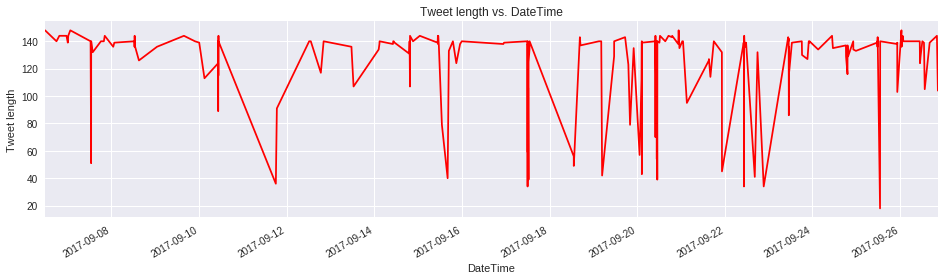

In [14]:
# plot Series obj
ax = time_length.plot(figsize=(16,4), color='r', title='Tweet length vs. DateTime')
ax.set_xlabel("DateTime")
ax.set_ylabel("Tweet length")

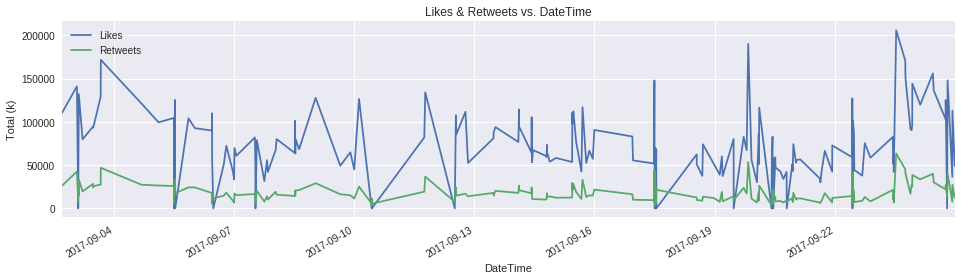

In [116]:
# Plot Likes and retweets over time:
time_favorite.plot(figsize=(16,4), label="Likes", legend=True, title="Likes & Retweets vs. DateTime") 
ax = time_retweet.plot(figsize=(16,4), label="Retweets", legend=True)
ax.set_xlabel("DateTime")
ax.set_ylabel("Total (k)")

In [16]:
# Get sources
sources = []
for source in df.Source:
    if source not in sources:
        sources.append(source)
        
# Print sources
print("Tweet created using:")
for source in sources:
    print("* {}".format(source))

Tweet created using:
* Twitter for iPhone
* Media Studio


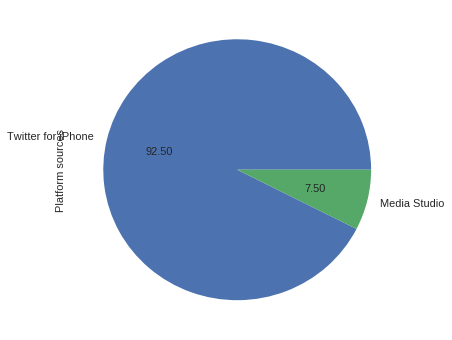

In [17]:
# Create a pie chart of sources:

percent = np.zeros(len(sources))

for source in df.Source:
    for idx in range(len(sources)):
        if source == sources[idx]:
            percent[idx] += 1
            pass

percent /= 100

pie_chart = pd.Series(percent, index=sources, name='Platform sources')
pie_chart.plot.pie(fontsize=11, autopct='%.2f', figsize=(6, 6))